<a href="https://colab.research.google.com/github/eftekhar-hossain/SKBI_Training/blob/main/Intermediate/Session_10_(Model_Fusion).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<center> <h1> <u> <font color='red'> Training on AI and ML with Python (Intermediate) </font> </u> </h1> </center>

In [1]:
%%time
import os
from glob import glob
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import re
import nltk
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix
import tensorflow as tf
from tensorflow import keras

CPU times: user 2.8 s, sys: 396 ms, total: 3.2 s
Wall time: 4.02 s


# News Dataset


In [2]:
!wget -O news.csv https://www.dropbox.com/s/pfwn4aj9syjwhcw/News_12Class.csv?dl=0

--2022-07-02 10:19:53--  https://www.dropbox.com/s/pfwn4aj9syjwhcw/News_12Class.csv?dl=0
Resolving www.dropbox.com (www.dropbox.com)... 162.125.9.18, 2620:100:601b:18::a27d:812
Connecting to www.dropbox.com (www.dropbox.com)|162.125.9.18|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /s/raw/pfwn4aj9syjwhcw/News_12Class.csv [following]
--2022-07-02 10:19:53--  https://www.dropbox.com/s/raw/pfwn4aj9syjwhcw/News_12Class.csv
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uccd8d6210914e9a026cfe3aa9ec.dl.dropboxusercontent.com/cd/0/inline/BoR_fAtdSnCz8-RRKYJe8XJnFLO9_rsZgIR15dPMW68nPmGiRA7MVeaU5KYJsnKqvkIR1Vl37k_aej31oyXv_8fwnxNfKfX3YkNFfvQkVMqvm5908ZTSUC4ASLFiXOxADSbv8wS2UP50C9Duqtn4gI5Ognqp219BvFIaKiFNjyREEg/file# [following]
--2022-07-02 10:19:54--  https://uccd8d6210914e9a026cfe3aa9ec.dl.dropboxusercontent.com/cd/0/inline/BoR_fAtdSnCz8-RRKYJe8XJnFLO9_rsZgIR15dPMW68nPmGiRA7

In [3]:
%%time
               
dataset = pd.read_csv("news.csv")
dataset

CPU times: user 5.85 s, sys: 614 ms, total: 6.47 s
Wall time: 6.45 s


In [ ]:
dataset

In [4]:
dataset.columns

Index(['Unnamed: 0', 'Text', 'Category'], dtype='object')

In [10]:
dataset['Category'].unique()

array(['Accident', 'Art', 'Crime', 'Economics', 'Education',
       'Entertainment', 'Environment', 'International', 'Opinion',
       'Politics', 'Science', 'Sports'], dtype=object)

In [5]:
number_of_classes = len(dataset['Category'].unique()

In [11]:
# Encode the labels
dataset['label'] = dataset['Category'].replace({'Accident':0, 'Art':1, 'Crime':2, 'Economics':3, 'Education':4, 'Entertainment':5, 'Environment':6, 'International':7, 'Opinion':8, 'Politics':9, 'Science':10, 'Sports':11})

In [6]:
print('Total size of the dataset : ',len(dataset))

Total size of the dataset :  95866


In [14]:
# cleaning function
def cleaning(row):
  text = re.sub('[^\u0980-\u09FF]',' ', row) ## removing punctions
  return text 

dataset['cleaned'] = dataset.Text.apply(cleaning)  

In [15]:
## Printing the raw dataset
for i in list(np.random.randint(1,len(dataset),10)):
  print(dataset['cleaned'][i],"\n",dataset['label'][i])

আইন কমিশনের প্রস্তাবের পর আইন মন্ত্রণালয় সম্পর্কিত সংসদীয় কমিটির সভাপতি সুরঞ্জিত সেনগুপ্তের বক্তব্যের প্রতিক্রিয়ায় রোববার এক আলোচনা সভায় বিএনপির ভারপ্রাপ্ত মহাসচিব মির্জা ফখরুল ইসলাম আলমগীর দলের অবস্থান প্রকাশ করেন  জাতীয় প্রেসক্লাবের আলোচনা অনুষ্ঠানে ফখরুল বলেন   এই সংসদের কোনো বৈধ্তা নেই  এরকম একটি সংসদে সংবিধানের ৯৬ অনুচ্ছেদ যা বাতিল করা হয়েছিল  তা আবার সরকার ফিরিয়ে আনতে যাচ্ছেন  এর মাধ্যমে তারা  সরকার  বিচারপতিদের অভিশংসনের ক্ষমতা হাতে নিয়ে আসতে যাচ্ছে   একই স্থানে আরেকটি আলোচনা সভায় বিএনপির স্থায়ী কমিটির সদস্য গয়েশ্বর চন্দ্র রায় বলেন   বিচারপতিদের অভিশংসনের ক্ষমতা সংসদের কাছে দেয়ার ষড়যন্ত্র চলছে  উদ্দেশ্য শেখ হাসিনা সরকারকে চিরস্থায়ীভাবে ক্ষমতায় রাখা   আওয়ামী লীগ বিচার বিভাগের ওপর আওয়ামী লীগ প্রভাব খাটাচ্ছে বলে বিএনপি অভিযোগ করে আসছে  এই নিয়ে মন্তব্যের জন্য আদালতে গয়েশ্বরকে তলবও করা হয়েছিল  ১৯৭২ সালের সংবিধানে বিচারপতিদের অভিশংসনের ক্ষমতা সংসদের হাতে থাকলেও পরে জিয়াউর রহমান এক সামরিক ফরমানে ওই অনুচ্ছেদ বাতিল করেন  বিচারপতিদের অপসারণের ক্ষমতা এখন সুপ্রিম জুডিশিয়াল কাউন্সিলের কাছে  

# Data Preprocessing


###Tokenization

In [16]:
%%time
max_words = 100000

from keras.preprocessing.text import Tokenizer

tokenizer = Tokenizer(num_words = max_words, filters='!"#$%&()*+,-./:;<=>?@[\\]^_`{|}~\t\n-', 
                      split=' ', char_level=False, oov_token=None, document_count=0)

tokenizer.fit_on_texts(dataset['cleaned'])

CPU times: user 35.8 s, sys: 207 ms, total: 36 s
Wall time: 36.2 s


### Attributes of Tokenizer
1. word_counts: A dictionary of words and their counts.

2. word_docs: A dictionary of words and how many documents each appeared in.

3. word_index: A dictionary of words and their uniquely assigned integers.

4. document_count:An integer count of the total number of documents that were used to fit the Tokenizer.

By using these attributes we can find the most frequent words and less frequent words and words that might be useful for our system

In [17]:
%%time
word_counts = tokenizer.word_counts
word_docs = tokenizer.word_docs
word_index = tokenizer.word_index
document_count = tokenizer.document_count

print(len(word_counts))

429370
CPU times: user 105 µs, sys: 3 µs, total: 108 µs
Wall time: 85.1 µs


In [18]:
# Printing the values to understand their functions
def print_func(i, j):
    print(i, j)

print("Words ===> Counts")
k = 0
for (i, j) in word_counts.items():
        print_func(i, j)
        k+=1
        if k== 10:
          k=0
          break

print("\nWords ===> Documents")       
for (i, j) in word_docs.items():
        print_func(i, j)
        k+=1
        if k== 10:
          k=0
          break

print("\nWords ===> Index")
for (i, j) in word_index.items():
        print_func(i, j)
        k+=1
        if k== 10:
          k=0
          break

print("Total Number of Documents: ", document_count)

Words ===> Counts
নাটোরের 455
বড়াইগ্রাম 130
উপজেলায় 3071
মাটির 1179
দেয়াল 482
চাপা 1910
পড়ে 11636
মা 7923
ও 338244
ছেলের 1528

Words ===> Documents
সোমবার 11911
বিডিনিউজ 29378
মৃত্যু 4928
জানিয়েছে 7104
মারা 6777
স্বামী 2009
পাড়ায় 257
পুরোনো 1078
বলে 44464
রহমান 18540

Words ===> Index
ও 1
করে 2
এ 3
না 4
বলেন 5
থেকে 6
করা 7
তিনি 8
এই 9
হবে 10
Total Number of Documents:  95866


### Frequency Distribution of Data Length
Here frequency of each length will be counted to find out which lenth size is more appropiate at the time of using pad sequences. we all plot this frequency in histogram to get a visual understanding.

In [ ]:
Length_frequency = {}

for i in range(len(dataset)):
     index = len(dataset['cleaned'][i])
     Length_frequency[index] = Length_frequency.get(index, 0)+1


Text(0.5, 1.0, 'Length-Frequency Distribution')

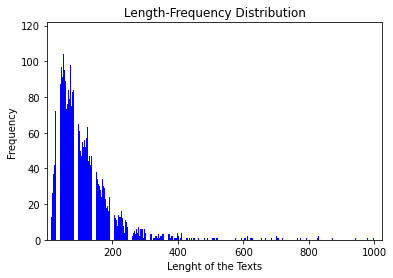

In [ ]:
import seaborn as sns

plt.bar(list(Length_frequency.keys()), Length_frequency.values(), color ='b')
plt.xlim(1, 1024)

plt.xlabel('Lenght of the Texts')
plt.ylabel('Frequency')
plt.title('Length-Frequency Distribution')

### Encoding Data into Numbers
To encode our text into numbers we will use  text_to_word_sequence function from keras.

In [19]:
%%time
# Convert string into list of integer indices
sequences = tokenizer.texts_to_sequences(dataset['cleaned'])

CPU times: user 29.2 s, sys: 106 ms, total: 29.3 s
Wall time: 29.3 s


In [20]:
word_index = tokenizer.word_index
print('Found %s unique tokens.' % len(word_index))
# print(dataset['cleaned'][3])
# print(sequences[1])

Found 429370 unique tokens.


### Pad Sequence
To make all the texts fo the same length we will use pad sequence from keras to standardize their length.

Corpus contain our final processed data and labels contains the labels of associated data.

In [21]:
%%time
## Before padding length of different training examples 
mx = len(sequences[0])
for x in sequences:
  mx =max(mx, len(x))
print("Maximum Text length",mx)

##We can also determine maxlen by plotting the frequency distribution of the lengths
corpus = keras.preprocessing.sequence.pad_sequences(sequences, value=0.0, padding='post', maxlen= 100)
## We get the maxlen value from the Length frequency distribution

print(corpus[1])


Maximum Text length 5603
[ 1052  2546  2417    17  2630   689    14   293 18764  1002   152   219
   230   337     3   284   398   387   953   614   219   337  3263 16402
   202    38   514    17    45  7699   788    73 26199  6768   313   183
 41743    26  5680     6   172 43519 22517    22   527   250  3547  1298
   160  1549  2050    19 26199  2490 63204  1127    20   384   120     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0]
CPU times: user 932 ms, sys: 155 ms, total: 1.09 s
Wall time: 923 ms


In [22]:
print("Shape of the courpus: ", corpus.shape)

for i in range(2):
    print(dataset['cleaned'][i],"\n",corpus[i])

Shape of the courpus:  (95866, 100)
 নাটোরের বড়াইগ্রাম উপজেলায় মাটির দেয়াল চাপা পড়ে মা ও ছেলের মৃত্যু হয়েছে  সোমবার রাত ৮টার দিকে উপজেলার মেরিগাছা বাজারের পাশে জেলে পাড়ায় এ দুর্ঘটনা ঘটে বলে প্রত্যক্ষদর্শীরা জানিয়েছে  নিহতরা হলেন  রাজিয়া বেগম  ৫৫  ও তার ছেলে হাবিবুর রহমান হবি  ৩৫   রাজিয়া বেগমের স্বামী নূর মোহাম্মদ বিডিনিউজ টোয়েন্টিফোর ডটকমকে জানান  রাতে মা ও ছেলে বাড়ির উঠানে বসে মাছ ধরার চাঁই তৈরি করছিলেন  এ সময় ঘরের পুরোনো মাটির দেয়াল ধসে তাদের ওপর পড়ে   হাসপাতালে নেওয়ার পথে রাত ৯টার দিকে রাজিয়া মারা যান  রাত পৌনে ১০টার দিকে মারা যায় হাবিব    
 [ 6996 16401  1405  3272  6728  2180   354   532     1  2623   689    14
   262   107  3845   106   293  2246   622  4152  9451     3   577   398
    20  4588   458  3748   623 14294   727  1225     1    16   360  2699
    89 34942   531 14294  5581  1594  1136   392    60    69   245    25
   317   532     1   360  1677 16402   701  2255  2744 86029   200  2501
     3    45  2030  2835  3272  6728  3303    30   135   354   342   554
   461   1

## Creating Train, Test and Validation set


In [25]:
X_train,X_test,y_train,y_test = train_test_split(corpus,dataset['label'],test_size = 0.1, random_state = 0)

print("Training Size: ",X_train.shape)
print("Test Size: ",X_test.shape)

Training Size:  (86279, 100)
Test Size:  (9587, 100)


## Late Fusion or Decision Fusion 


Concate the output of three models: BiLSTM , CNN, BiLSTM+CNN

In [28]:
# Keras Functional API

import tensorflow as tf
from tensorflow import keras
from keras.layers import Input, Dense, Activation, Dropout,Flatten,Embedding
from keras.layers import Conv1D,MaxPooling1D,GlobalAveragePooling1D, Bidirectional, LSTM, GRU
from keras.models import Model
from tensorflow.keras.optimizers import Adam,SGD,Nadam,RMSprop
from tensorflow.keras.models import load_model

In [62]:
keras.backend.clear_session()

max_length = 100
embedding_dim = 64
number_of_classes = len(dataset['label'].unique())


###### BiLSTM Model #######
bi_text_inputs = Input(shape=(max_length,))
bi_embedding_layer = Embedding(max_words,embedding_dim)(bi_text_inputs)
LSTM_Layer_1 = Bidirectional(LSTM(32))(bi_embedding_layer)
bi_dense_layer_1 = Dense(number_of_classes, activation='softmax')(LSTM_Layer_1)
lstm_model = Model(inputs=bi_text_inputs, outputs=bi_dense_layer_1)
# lstm_model.compile(optimizer = 'adam',
#                       loss = 'binary_crossentropy',
#                       metrics =['accuracy'])

### CNN Model ####
cnn_text_inputs = Input(shape=(max_length,))
cnn_embedding_layer = Embedding(max_words,embedding_dim)(cnn_text_inputs)
cnn_conv1 = Conv1D(32,2,activation='relu')(cnn_embedding_layer)
cnn_pool1 = MaxPooling1D(2)(cnn_conv1)
cnn_flat = Flatten()(cnn_pool1)
cnn_dense_layer_1 = Dense(number_of_classes, activation='softmax')(cnn_flat)
cnn_model = Model(inputs=cnn_text_inputs, outputs=cnn_dense_layer_1)
# cnn_model.compile(optimizer = 'adam',
#                       loss = 'binary_crossentropy',
#                       metrics =['accuracy'])

### LSTM + CNN Model ####
lc_text_inputs = Input(shape=(max_length,))
lc_embedding_layer = Embedding(max_words,embedding_dim)(lc_text_inputs)
LSTM_Layer = Bidirectional(LSTM(32,return_sequences=True))(lc_embedding_layer)
lc_conv1 = Conv1D(32,2,activation='relu')(LSTM_Layer)
lc_pool1 = MaxPooling1D(2)(lc_conv1)
lc_flat = Flatten()(lc_pool1)
lc_dense_layer_1 = Dense(number_of_classes, activation='softmax')(lc_flat)
cnn_lstm_model = Model(inputs=lc_text_inputs, outputs=lc_dense_layer_1)
# cnn_lstm_model.compile(optimizer = 'adam',
#                       loss = 'binary_crossentropy',
#                       metrics =['accuracy'])


In [63]:
# Concatenating the output of 3 CNN
fusion_layer = keras.layers.concatenate([lstm_model.output, cnn_model.output,cnn_lstm_model.output],name = 'Fusion')
hidden4 = Dense(10, activation='relu')(fusion_layer)
final_out = Dense(number_of_classes, activation='softmax')(hidden4)

In [36]:
from keras.utils.vis_utils import plot_model

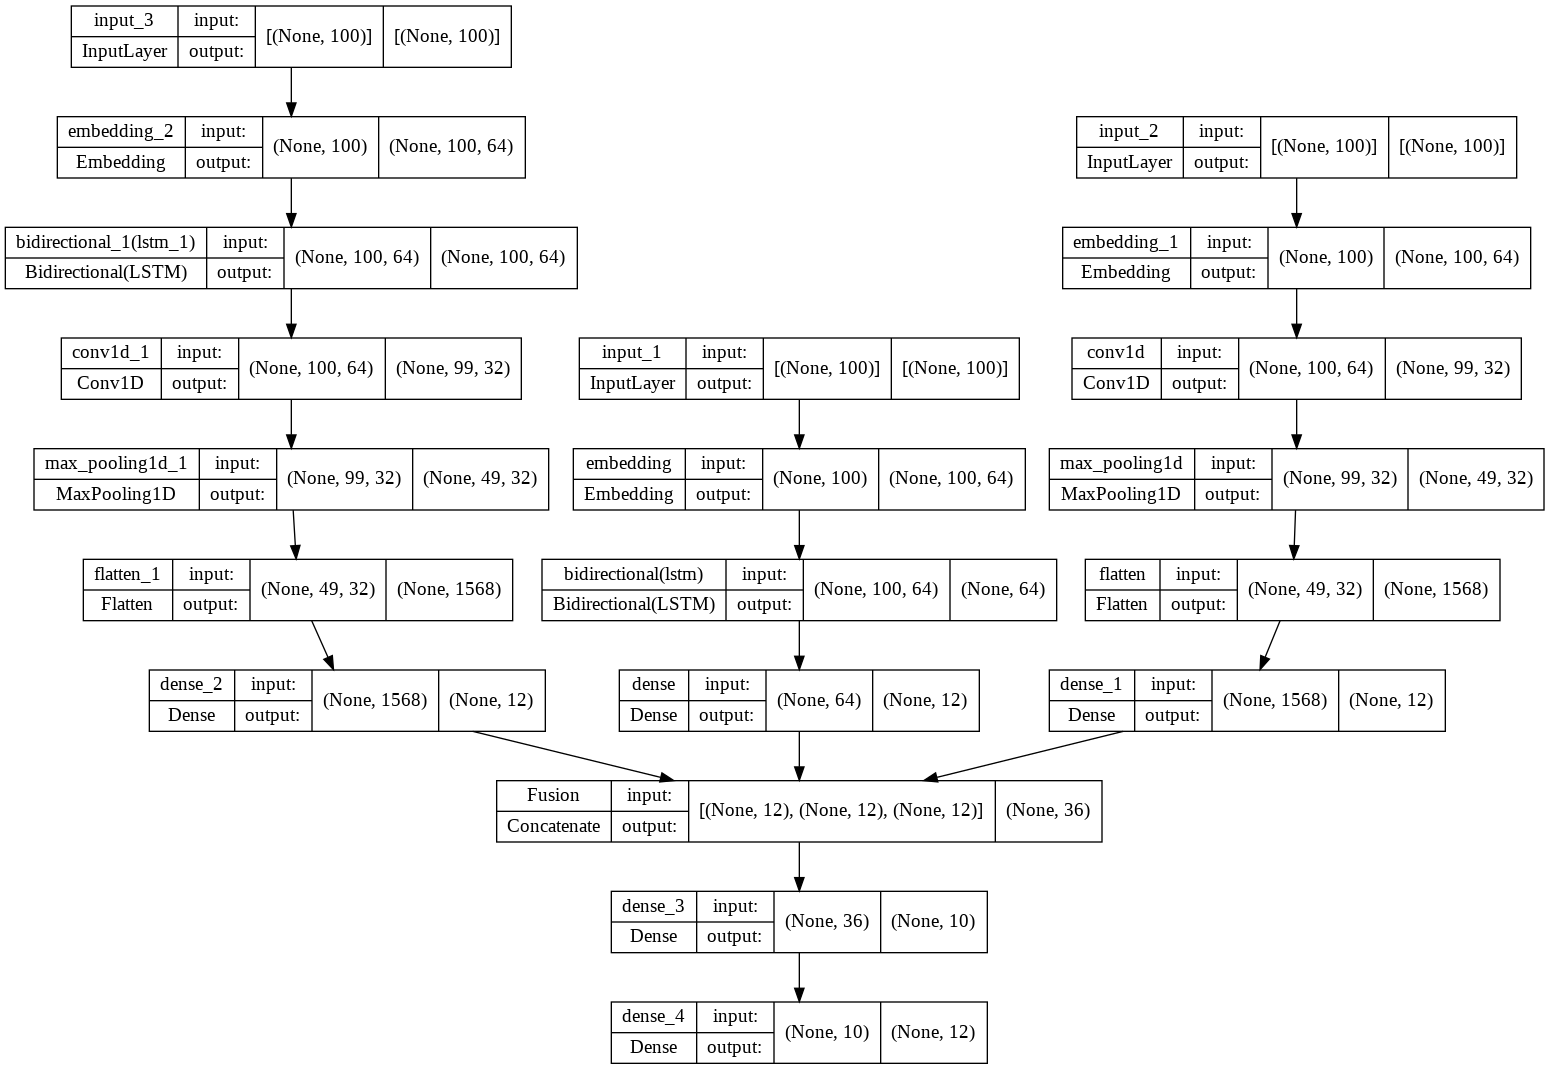

In [64]:
#Defining model input and output
com_model = Model(inputs = [lstm_model.input, cnn_model.input,cnn_lstm_model.input], outputs=final_out,name = "E-ConvNet")
com_model.compile(loss='sparse_categorical_crossentropy', optimizer=RMSprop(), metrics=['accuracy'])
#com_model.summary()
# Plot model
plot_model(com_model, to_file='early fusion.png', show_shapes=True, show_layer_names=True)

In [65]:
%%time
history = com_model.fit([X_train,X_train,X_train],
                              y_train,
                              epochs = 5,
                              batch_size = 256,
                              verbose = 1,
                              validation_split =0.1)

Epoch 1/5
304/304 [==============================] - 18s 35ms/step - loss: 1.8617 - accuracy: 0.4556 - val_loss: 1.4519 - val_accuracy: 0.6269
Epoch 2/5
304/304 [==============================] - 9s 30ms/step - loss: 1.1422 - accuracy: 0.7028 - val_loss: 1.0774 - val_accuracy: 0.6967
Epoch 3/5
304/304 [==============================] - 9s 30ms/step - loss: 0.8303 - accuracy: 0.7664 - val_loss: 0.9632 - val_accuracy: 0.7318
Epoch 4/5
304/304 [==============================] - 10s 32ms/step - loss: 0.6401 - accuracy: 0.8311 - val_loss: 0.9042 - val_accuracy: 0.7597
Epoch 5/5
304/304 [==============================] - 10s 33ms/step - loss: 0.5079 - accuracy: 0.8712 - val_loss: 0.8981 - val_accuracy: 0.7625
CPU times: user 1min 3s, sys: 6.08 s, total: 1min 9s
Wall time: 56.2 s


#### Plotting accuracy and loss graphs

Finaly loss and accuracy graph is plotted to take some important decision such as after how many epochs our model starts to overfit, what batch size give us better result, whether we need to get more data or not.

In [ ]:
history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

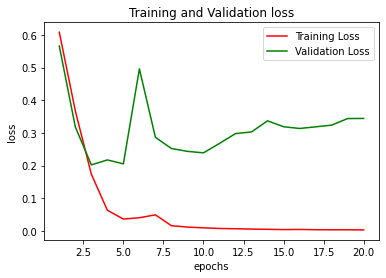

In [ ]:
import matplotlib.pyplot as plt

acc = history_dict['accuracy']
val_acc = history_dict['val_accuracy']

loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(acc)+1)

plt.plot(epochs, loss, 'r-', label='Training Loss')
plt.plot(epochs, val_loss, 'g', label = 'Validation Loss')
plt.title('Training and Validation loss')
plt.legend()
plt.xlabel('epochs')
plt.ylabel('loss')
plt.show()

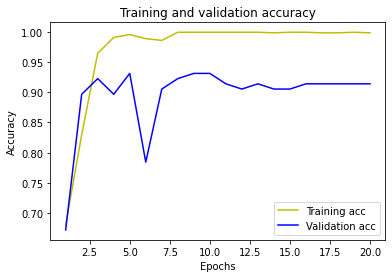

In [ ]:
plt.clf()   # clear figure

plt.plot(epochs, acc, 'y', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()


In [79]:
y_pred = np.argmax(com_model.predict([X_test,X_test,X_test]),axis = -1)
y_pred

array([ 5,  5,  5, ...,  5, 10, 10])

###Performance 

In [80]:
print(classification_report(y_test,y_pred,))

              precision    recall  f1-score   support

           0       0.07      0.01      0.02       634
           1       0.00      0.00      0.00       281
           2       0.00      0.00      0.00       865
           3       0.00      0.00      0.00       354
           4       0.05      0.00      0.00      1244
           5       0.10      0.67      0.18       993
           6       0.00      0.00      0.00       443
           7       0.06      0.09      0.07       489
           8       0.09      0.11      0.10       809
           9       0.00      0.00      0.00      1981
          10       0.02      0.05      0.03       301
          11       0.10      0.04      0.05      1193

    accuracy                           0.09      9587
   macro avg       0.04      0.08      0.04      9587
weighted avg       0.05      0.09      0.04      9587



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
confusion_matrix(y_test,y_pred)

# Early Fusion

In [66]:
keras.backend.clear_session()

max_length = 100
embedding_dim = 64
number_of_classes = len(dataset['label'].unique())


###### BiLSTM Model #######
bi_text_inputs = Input(shape=(max_length,))
bi_embedding_layer = Embedding(max_words,embedding_dim)(bi_text_inputs)
LSTM_Layer_1 = Bidirectional(LSTM(32))(bi_embedding_layer)
bi_dense_layer_1 = Dense(20, activation='relu')(LSTM_Layer_1)
lstm_model = Model(inputs=bi_text_inputs, outputs=bi_dense_layer_1)
# lstm_model.compile(optimizer = 'adam',
#                       loss = 'binary_crossentropy',
#                       metrics =['accuracy'])

### CNN Model ####
cnn_text_inputs = Input(shape=(max_length,))
cnn_embedding_layer = Embedding(max_words,embedding_dim)(cnn_text_inputs)
cnn_conv1 = Conv1D(32,2,activation='relu')(cnn_embedding_layer)
cnn_pool1 = MaxPooling1D(2)(cnn_conv1)
cnn_flat = Flatten()(cnn_pool1)
cnn_dense_layer_1 = Dense(20, activation='relu')(cnn_flat)
cnn_model = Model(inputs=cnn_text_inputs, outputs=cnn_dense_layer_1)
# cnn_model.compile(optimizer = 'adam',
#                       loss = 'binary_crossentropy',
#                       metrics =['accuracy'])

### LSTM + CNN Model ####
lc_text_inputs = Input(shape=(max_length,))
lc_embedding_layer = Embedding(max_words,embedding_dim)(lc_text_inputs)
LSTM_Layer = Bidirectional(LSTM(32,return_sequences=True))(lc_embedding_layer)
lc_conv1 = Conv1D(32,2,activation='relu')(LSTM_Layer)
lc_pool1 = MaxPooling1D(2)(lc_conv1)
lc_flat = Flatten()(lc_pool1)
lc_dense_layer_1 = Dense(20, activation='relu')(lc_flat)
cnn_lstm_model = Model(inputs=lc_text_inputs, outputs=lc_dense_layer_1)
# cnn_lstm_model.compile(optimizer = 'adam',
#                       loss = 'binary_crossentropy',
#                       metrics =['accuracy'])


In [67]:
# Concatenating the output of 3 CNN
fusion_layer = keras.layers.concatenate([lstm_model.output, cnn_model.output,cnn_lstm_model.output],name = 'Fusion')
hidden4 = Dense(10, activation='relu')(fusion_layer)
final_out = Dense(number_of_classes, activation='softmax')(hidden4)

In [68]:
from keras.utils.vis_utils import plot_model

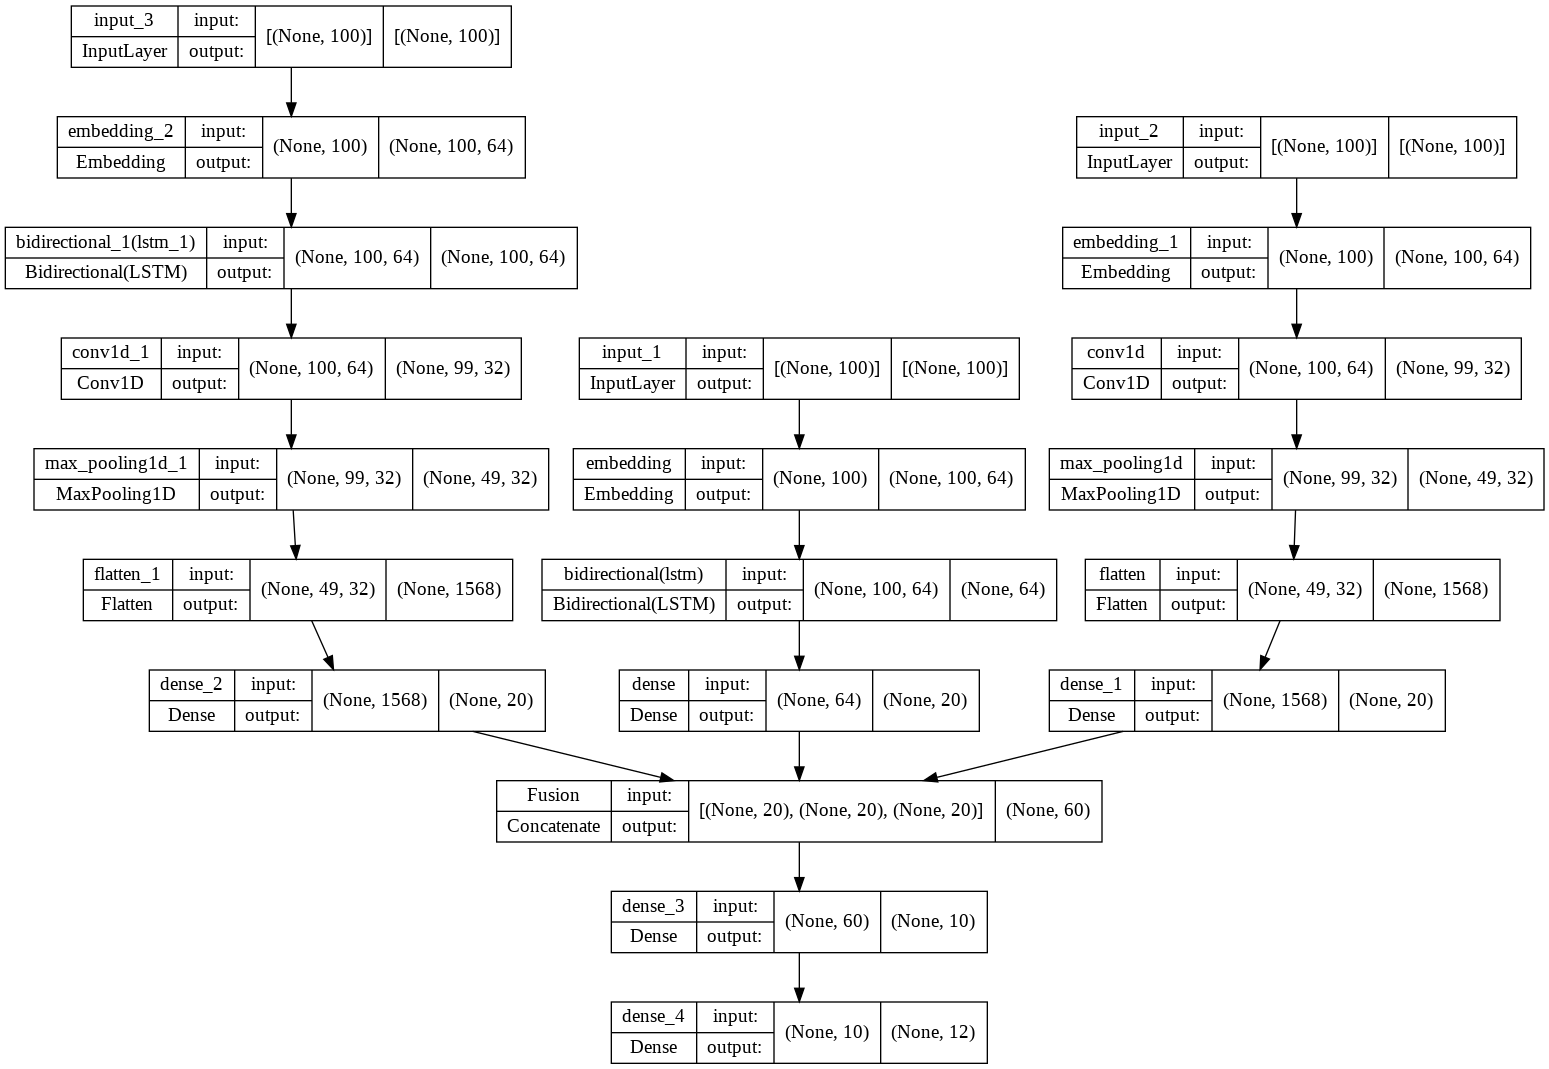

In [69]:
#Defining model input and output
com_model = Model(inputs = [lstm_model.input, cnn_model.input,cnn_lstm_model.input], outputs=final_out,name = "E-ConvNet")
com_model.compile(loss='sparse_categorical_crossentropy', optimizer=RMSprop(), metrics=['accuracy'])
#com_model.summary()
# Plot model
plot_model(com_model, to_file='early fusion.png', show_shapes=True, show_layer_names=True)